**DATA CLEANING**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\talre\Downloads\LA listings.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2708,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,81.0,30,45,2025-07-04,0.33,2,361,2,NaN
1,2732,Zen Life at the Beach,3041,Louise-Diane,Other Cities,Santa Monica,34.00440,-118.48095,Private room,110.0,7,24,2022-08-21,0.14,2,274,0,228269
2,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.87490,-118.11515,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN
3,6033,Poolside Serenity Studio,11619,Sarah,City of Los Angeles,Woodland Hills,34.16887,-118.64478,Entire home/apt,NaN,30,19,2020-03-22,0.10,6,0,0,NaN
4,6931,"RUN Runyon, Beau Furn Rms Terrace Hollyw Hill ...",3008,Chas.,City of Los Angeles,Hollywood,34.09626,-118.34372,Private room,88.0,30,37,2025-06-01,0.19,2,291,3,NaN


In [4]:
df.shape

(45886, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45886 entries, 0 to 45885
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45886 non-null  int64  
 1   name                            45885 non-null  object 
 2   host_id                         45886 non-null  int64  
 3   host_name                       45863 non-null  object 
 4   neighbourhood_group             45886 non-null  object 
 5   neighbourhood                   45886 non-null  object 
 6   latitude                        45886 non-null  float64
 7   longitude                       45886 non-null  float64
 8   room_type                       45886 non-null  object 
 9   price                           36819 non-null  float64
 10  minimum_nights                  45886 non-null  int64  
 11  number_of_reviews               45886 non-null  int64  
 12  last_review                     

In [6]:
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')

In [7]:
df['last_review'].min()

Timestamp('2011-05-21 00:00:00')

Our focus is on the data of the last 10 years. We will remove the remaining entries.

In [8]:
df['last_review'].max()

Timestamp('2025-09-02 00:00:00')

In [9]:
#Deleting data values that are from before 2015.
#Making sure to keep the null values.
df = df[(df['last_review'].dt.year >= 2015) | (df['last_review'].isnull())]


In [10]:
df['last_review'].min()

Timestamp('2015-01-01 00:00:00')

In [11]:
df.shape

(45838, 18)

In [12]:
df.isnull().sum()

id                                    0
name                                  1
host_id                               0
host_name                            23
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              9042
minimum_nights                        0
number_of_reviews                     0
last_review                       12501
reviews_per_month                 12501
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           32989
dtype: int64

In [13]:
#dropping trivial columns
df.drop(['name','host_name','license'],axis=1, inplace=True)

In [14]:
df.shape

(45838, 15)

In [15]:
#checking for possible outliers- any strange spikes or drops.
print(df['price'].nsmallest(10))
print(df['price'].nlargest(10))
print(df['minimum_nights'].nsmallest(10))
print(df['minimum_nights'].nlargest(10))
print(df['availability_365'].nsmallest(10))
print(df['availability_365'].nlargest(10))

41658    8.0
41837    8.0
41949    8.0
44816    8.0
44819    8.0
44820    8.0
44821    8.0
44822    8.0
44824    8.0
44825    8.0
Name: price, dtype: float64
43785    85000.0
23034    50053.0
24743    50053.0
28158    50053.0
40586    50053.0
38926    50045.0
38925    50030.0
38971    50015.0
24547    50000.0
26059    50000.0
Name: price, dtype: float64
5     1
9     1
19    1
26    1
31    1
32    1
35    1
58    1
66    1
76    1
Name: minimum_nights, dtype: int64
3531     1124
3646     1124
4939     1124
13584    1124
17278    1124
10469    1000
12507    1000
12563    1000
10694     950
735       750
Name: minimum_nights, dtype: int64
2     0
3     0
7     0
9     0
28    0
37    0
62    0
65    0
68    0
71    0
Name: availability_365, dtype: int64
8     365
24    365
29    365
44    365
59    365
73    365
78    365
80    365
95    365
99    365
Name: availability_365, dtype: int64


**Dealing with missing and strange values:**

In [16]:
#The listing priced $85000 seems to be an outlier, that is most likely an error.
index_to_drop = df[df['price'] == 85000.0].index
df.drop(index_to_drop, inplace=True)

In [17]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [18]:
#Replacing the null values in price column with median
df['price'] = df['price'].fillna(df.groupby(['room_type'])['price'].transform('median'))
df.isnull().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       12500
reviews_per_month                 12500
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

minimum_nights required for stay cannot be >1000, that is an extreme value. 1124 nights, around 3 years is not possible. To deal with these outliers we will set the maximum of minimum_nights to 365.

In [19]:
# Cap unrealistic values
df.loc[df["minimum_nights"] > 365, "minimum_nights"] = 365

In [20]:
print(df['minimum_nights'].nlargest(10))

158     365
452     365
529     365
655     365
735     365
815     365
823     365
937     365
1307    365
1433    365
Name: minimum_nights, dtype: int64


In [21]:
print((df.groupby(['room_type']))['price'].median())

room_type
Entire home/apt    187.0
Hotel room         266.0
Private room        68.0
Shared room         27.0
Name: price, dtype: float64


In [22]:
#replacing missing values in reviews per month with 0
df.fillna({'reviews_per_month':0}, inplace=True)
df.isnull().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       12500
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

We will be dropping the last_review column because it is not important for price prediction, instead we will use the reviews based columns.

In [23]:
#Removing duplicates if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [24]:
#Saving cleaned data as a csv file to use it for data visualization in Tableau
df.to_csv('cleaned_data.csv', index=False)

**BUILDING A REGRESSION MODEL**

In [25]:
#Change price to log of price to make sure large values do not overpower the model.
# Apply log transform to price(np.log1p handles 0s)
df['price'] = np.log1p(df['price'])
print(df['price'])

0        4.406719
1        4.709530
2        5.236442
3        5.236442
4        4.488636
           ...   
45881    5.204007
45882    4.955827
45883    4.406719
45884    4.532599
45885    4.521789
Name: price, Length: 45837, dtype: float64


<Axes: >

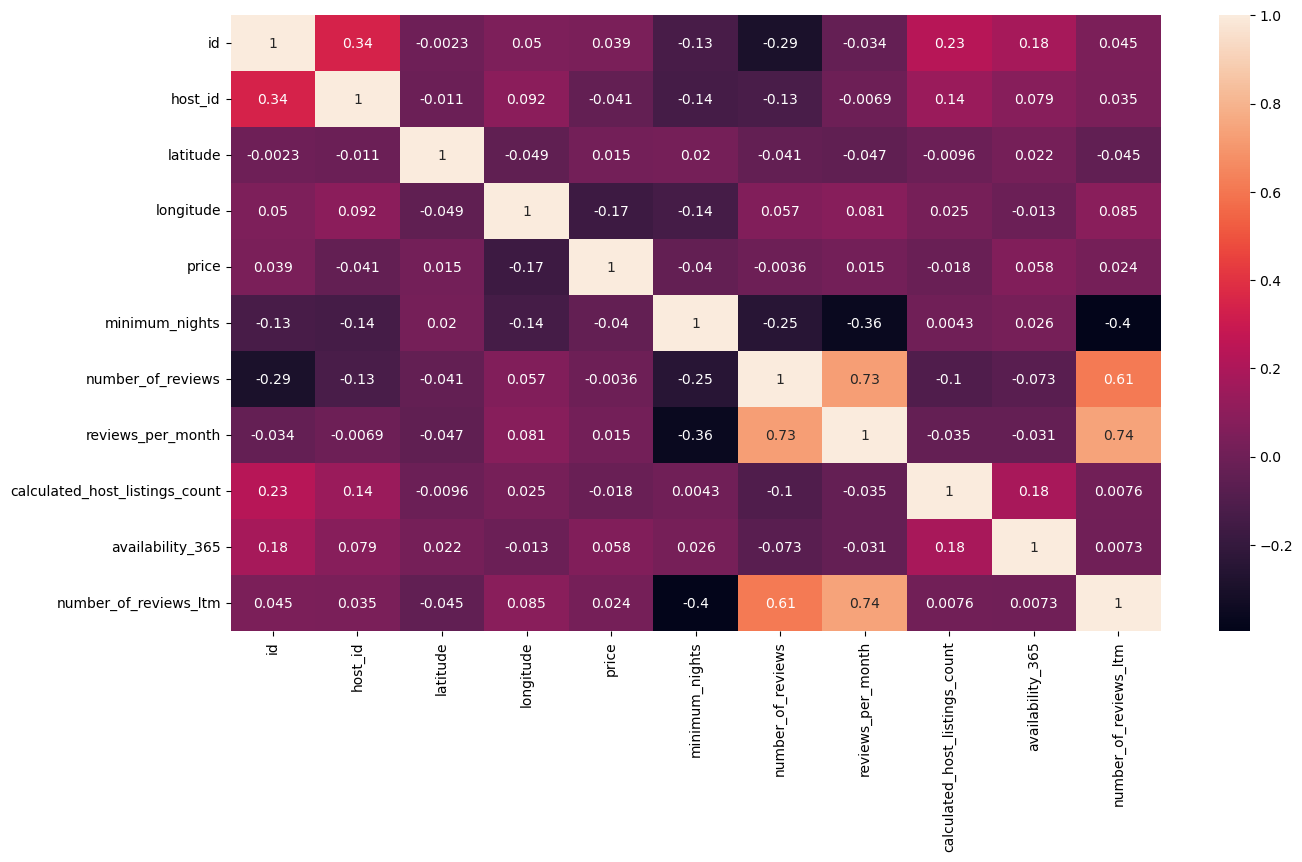

In [26]:
#Checking the correlation between varibales, mainly focusing on price.
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr(method='kendall')

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [27]:
#I will only keep the number of reviews ltm feature, it has a higher correlation with price and it is more recent.
df.drop(['id','host_id','last_review','number_of_reviews','reviews_per_month'],axis=1,inplace=True)
df.columns


Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

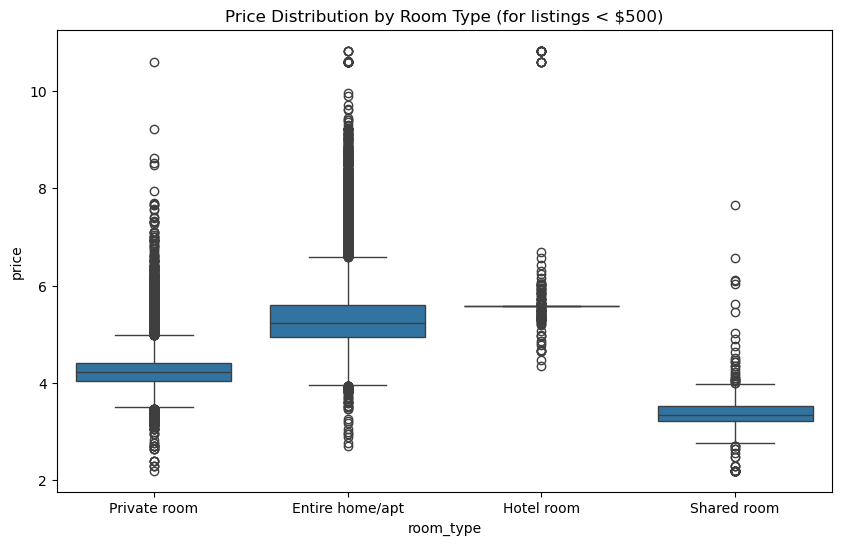

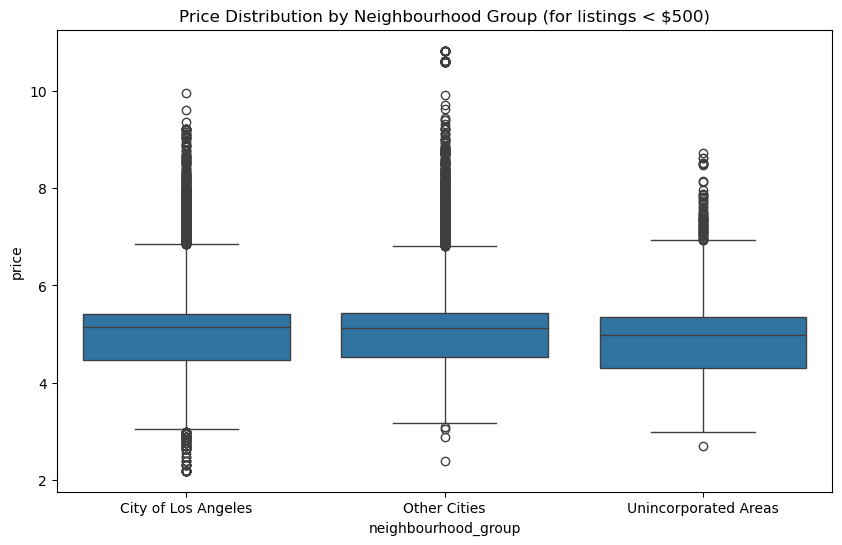

In [28]:
#Checking the correlation between price and categorical attributes
# Creating a filtered dataframe for visualization. 
# We'll look only at prices below $500 to get a closer look at the boxes.
df_filtered = df[df['price'] < 500]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='room_type', y='price')
plt.title('Price Distribution by Room Type (for listings < $500)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='neighbourhood_group', y='price')
plt.title('Price Distribution by Neighbourhood Group (for listings < $500)')
plt.show()

In [29]:
df.drop(['neighbourhood_group'],axis=1,inplace=True)
len(df['neighbourhood'].unique())

266

In [30]:
#'Neighbourhood' has too many unique values, it will slow down the model.
df.drop(['neighbourhood'],axis=1,inplace=True)

In [31]:
#Encoding categorical variable
df_encoded = pd.get_dummies(df, columns=['room_type'])
df_encoded.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,34.09625,-118.34605,4.406719,30,2,361,2,False,False,True,False
1,34.00440,-118.48095,4.709530,7,2,274,0,False,False,True,False
2,33.87490,-118.11515,5.236442,30,1,0,0,True,False,False,False
3,34.16887,-118.64478,5.236442,30,6,0,0,True,False,False,False
4,34.09626,-118.34372,4.488636,30,2,291,3,False,False,True,False


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()
y_train.head()

30350    5.087596
38375    5.147494
24693    5.298317
44099    5.393628
42001    5.017280
Name: price, dtype: float64

In [33]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()

#Get predictions (these will be on the log scale)
y_pred_log = rf_model.predict(X_test)

In [34]:
print(y_pred_log)

[5.59480648 5.18962001 5.40384443 ... 5.0481961  5.09285398 5.19227843]


In [35]:
r2_log = r2_score(y_test, y_pred_log)
mae_log = mean_absolute_error(y_test, y_pred_log)
print(r2_log, mae_log)


0.6152559615903377 0.3561023532951298


R-squared is 0.62 (62%), the model based on log prices is a good fit.

In [37]:
#Inverse transform predictions and test values
# We use np.expm1 to reverse np.log1p
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# c. Calculate metrics on the original dollar scale
r2 = r2_score(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

print(f"\n--- Random Forest Model Evaluation ---")
print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")


--- Random Forest Model Evaluation ---
R-squared (R²): 0.384
Mean Absolute Error (MAE): $158.97
Root Mean Squared Error (RMSE): $1333.04


In [39]:
importances = rf_model.feature_importances_

# 3. Creating a DataFrame to see them clearly
feature_list = X_train.columns
importance_df = pd.DataFrame({
    'feature': feature_list,
    'importance': importances
})

# 4. Sort to see the most important features at the top
importance_df_sorted = importance_df.sort_values(by='importance', ascending=False)

print("Feature Importance Ranking:")
print(importance_df_sorted.head(10))

Feature Importance Ranking:
                          feature  importance
6       room_type_Entire home/apt    0.469575
0                        latitude    0.139039
1                       longitude    0.131156
3  calculated_host_listings_count    0.062426
4                availability_365    0.056299
2                  minimum_nights    0.046219
7            room_type_Hotel room    0.040475
5           number_of_reviews_ltm    0.039463
9           room_type_Shared room    0.015348
8          room_type_Private room    0.000000


In [43]:
def suggest_price(rf_model):
    print("\nEnter details of the new Airbnb listing:")

    #numeric inputs
    latitude = float(input("Latitude: "))
    longitude = float(input("Longitude: "))
    minimum_nights = int(input("Minimum nights: "))
    calculated_host_listings_count = int(input("Number of listings the host has: "))
    availability_365 = int(input("Number of available days per year (0–365): "))
    number_of_reviews_ltm = int(input("Number of reviews in last 12 months: "))

    #room type
    print("\nRoom Type Options: 'Entire home/apt', 'Hotel room', 'Private room', 'Shared room'")
    room_type = input("Enter room type exactly as above: ")

    #one-hot encode the room type
    room_type_dict = {
        'room_type_Entire home/apt': 0,
        'room_type_Hotel room': 0,
        'room_type_Private room': 0,
        'room_type_Shared room': 0
    }
    if f'room_type_{room_type}' in room_type_dict:
        room_type_dict[f'room_type_{room_type}'] = 1
    else:
        print("⚠️ Invalid room type entered — defaulting to 'Private room'")
        room_type_dict['room_type_Private room'] = 1

    #assemble final input DataFrame
    new_data = pd.DataFrame([{
        'latitude': latitude,
        'longitude': longitude,
        'minimum_nights': minimum_nights,
        'calculated_host_listings_count': calculated_host_listings_count,
        'availability_365': availability_365,
        'number_of_reviews_ltm': number_of_reviews_ltm,
        **room_type_dict
    }])

    # predict (convert log-price back to dollars)
    predicted_log_price = rf_model.predict(new_data)  # Changed 'model' to 'rf_model' to match parameter name
    predicted_price = np.expm1(predicted_log_price)

    print(f"\n💰 Suggested Listing Price: ${predicted_price[0]:,.2f}")

 


In [ ]:
suggest_price(rf_model)


Enter details of the new Airbnb listing:
